Imports

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Analysis

In [87]:
data_info = pd.read_csv('./data/lending_club_info.csv')

In [88]:
data_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [89]:
data = pd.read_csv('./data/lending_club_loan_two.csv')

In [90]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [91]:
data.shape

(396030, 27)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [93]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [94]:
data.loan_status

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

<Axes: xlabel='loan_status', ylabel='count'>

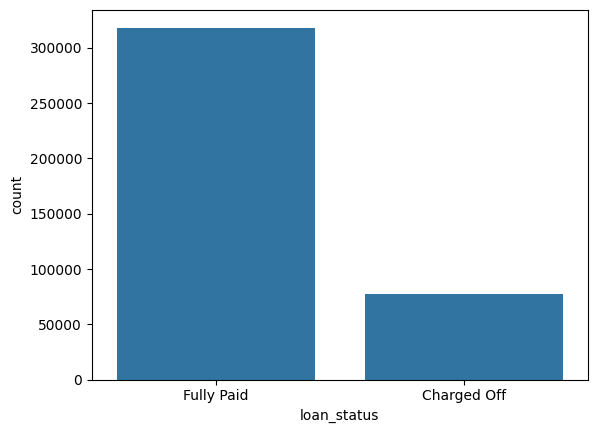

In [95]:
sns.countplot(data, x='loan_status')

<Axes: xlabel='loan_amnt', ylabel='Count'>

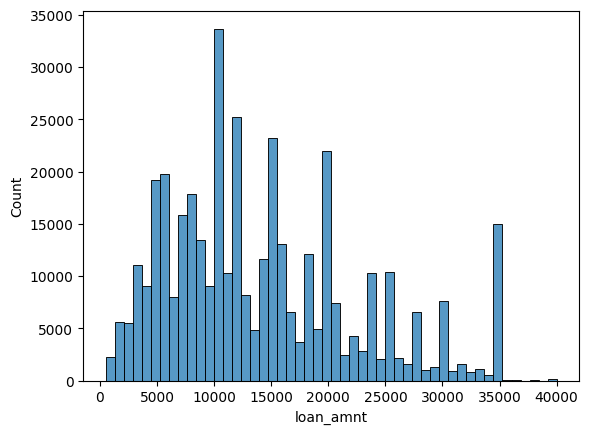

In [96]:
sns.histplot(data, x='loan_amnt', bins=50)

In [97]:
data.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

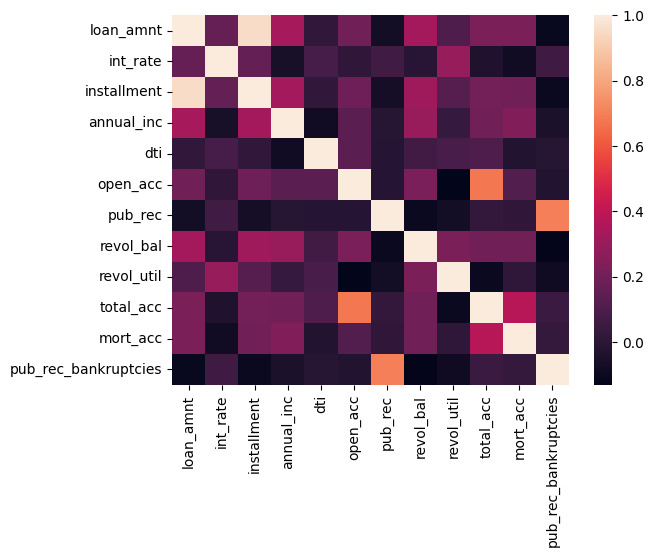

In [98]:
sns.heatmap(data.corr(numeric_only=True))

<Axes: xlabel='loan_amnt', ylabel='installment'>

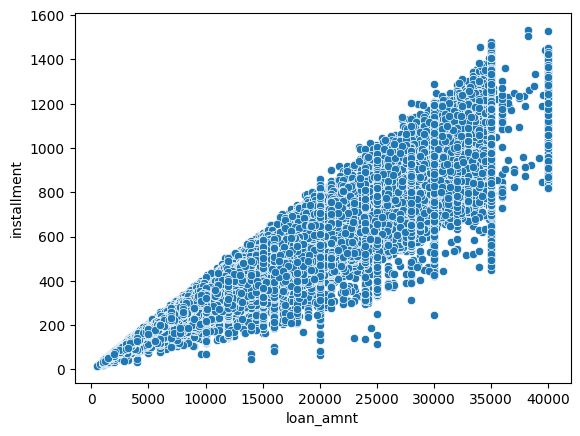

In [99]:
sns.scatterplot(data, y='installment', x='loan_amnt')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

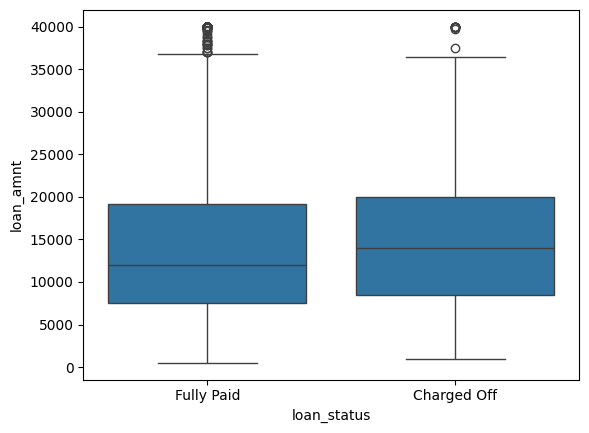

In [100]:
sns.boxplot(data, x='loan_status', y='loan_amnt')

<Axes: xlabel='loan_status', ylabel='installment'>

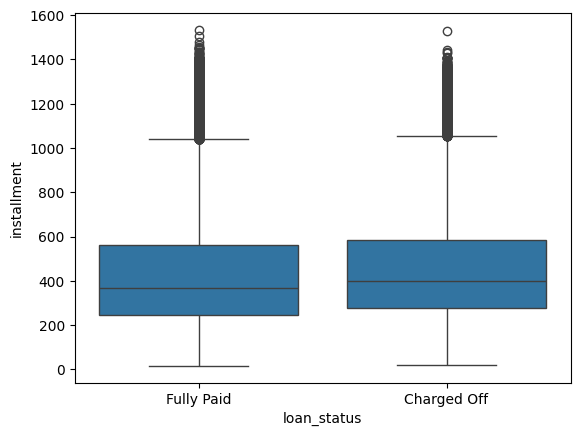

In [101]:
sns.boxplot(data, x='loan_status', y='installment')


In [102]:
data.groupby(by='loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [103]:
data['grade'].value_counts().sort_index()

grade
A     64187
B    116018
C    105987
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [104]:
data['sub_grade'].value_counts().sort_index()

sub_grade
A1     9729
A2     9567
A3    10576
A4    15789
A5    18526
B1    19182
B2    22495
B3    26655
B4    25601
B5    22085
C1    23662
C2    22580
C3    21221
C4    20280
C5    18244
D1    15993
D2    13951
D3    12223
D4    11657
D5     9700
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

<Axes: xlabel='grade', ylabel='loan_amnt'>

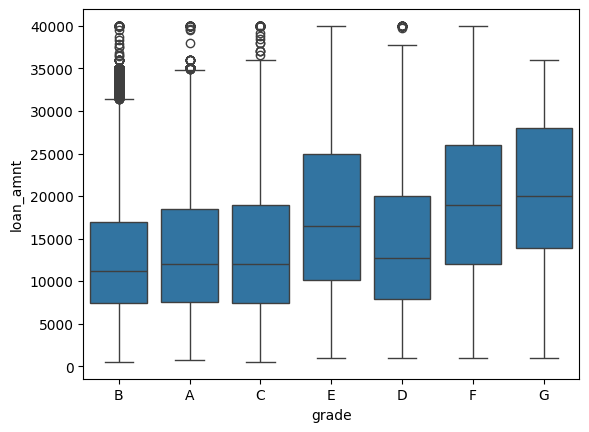

In [105]:
sns.boxplot(data, x='grade', y='loan_amnt')

<Axes: xlabel='grade', ylabel='count'>

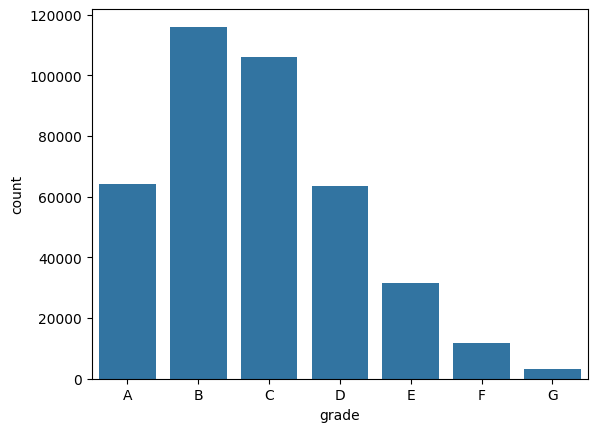

In [106]:
sns.countplot(data.sort_values(by='grade'), x='grade')

<Axes: xlabel='grade', ylabel='count'>

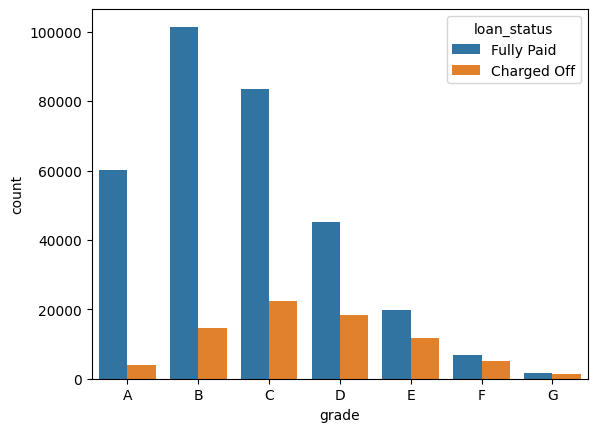

In [107]:
sns.countplot(data.sort_values(by='grade'), x='grade', hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

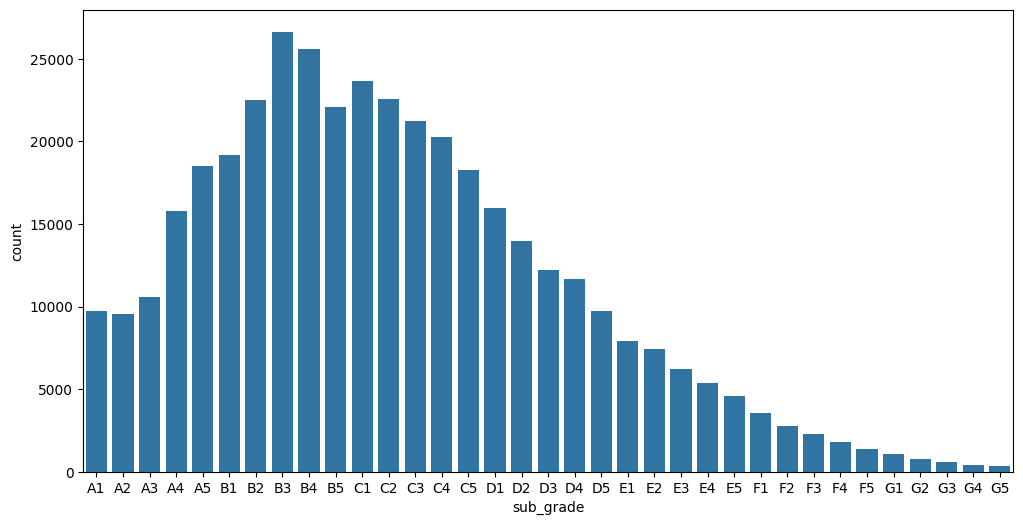

In [108]:
plt.figure(figsize=(12,6))
sns.countplot(data.sort_values(by='sub_grade'), x='sub_grade')

<Axes: xlabel='sub_grade', ylabel='count'>

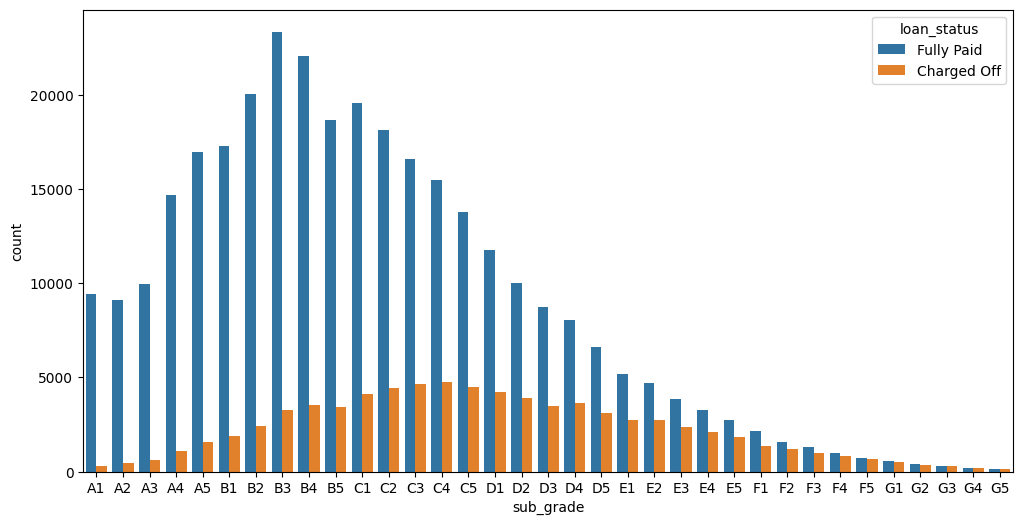

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(data.sort_values(by='sub_grade'), x='sub_grade', hue='loan_status')

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

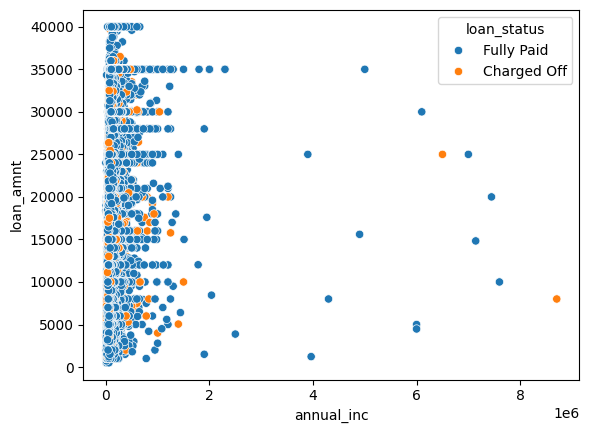

In [110]:
sns.scatterplot(data, x='annual_inc', y='loan_amnt', hue='loan_status')

In [111]:
data['dti'].value_counts()

dti
0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: count, Length: 4262, dtype: int64

<Axes: xlabel='loan_status', ylabel='dti'>

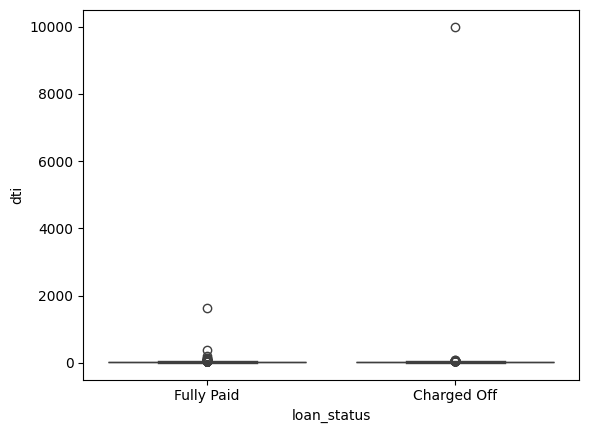

In [112]:
sns.boxplot(data, x='loan_status', y='dti')

In [113]:
data['loan_repaid'] = 0

In [114]:
data.loc[data['loan_status'] == 'Fully Paid', 'loan_repaid'] = 1

In [115]:
data[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<Axes: >

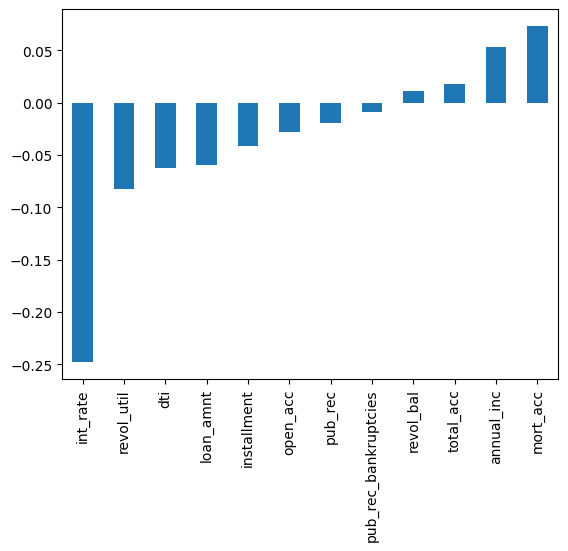

In [116]:
data.corr(numeric_only=True)['loan_repaid'].sort_values()[:-1].plot(kind='bar')

Preprocessing

In [117]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [118]:
data.shape

(396030, 28)

In [119]:
396030 - data.count()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [120]:
(396030 - data.count())/3960.30

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [121]:
data['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [122]:
data = data.drop('emp_title', axis=1)

In [123]:
data['emp_length'].sort_values()

298084    1 year
76467     1 year
155319    1 year
267657    1 year
155310    1 year
           ...  
395946       NaN
395963       NaN
395988       NaN
395999       NaN
396015       NaN
Name: emp_length, Length: 396030, dtype: object

<Axes: xlabel='emp_length', ylabel='count'>

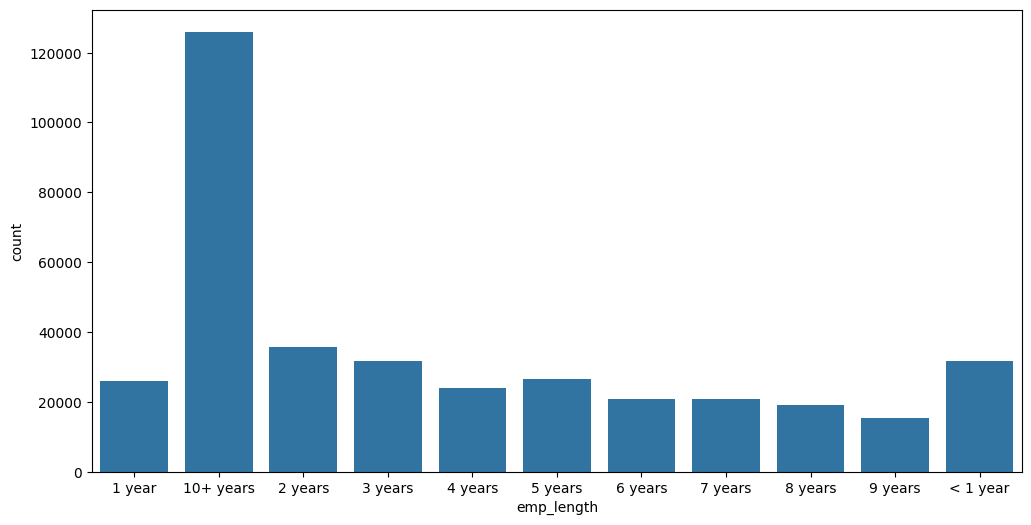

In [124]:
plt.figure(figsize=(12,6))
sns.countplot(data.sort_values(by='emp_length'), x='emp_length')

<Axes: xlabel='emp_length', ylabel='count'>

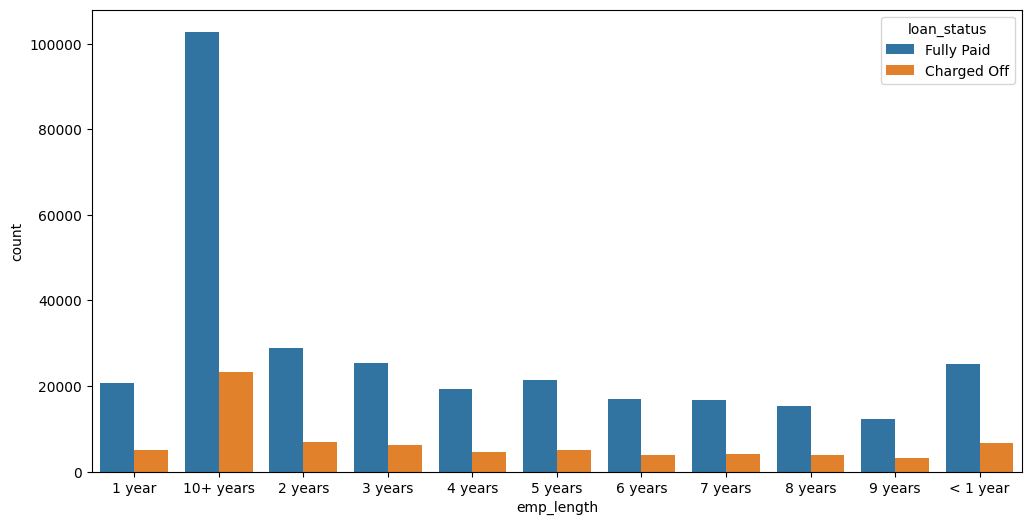

In [125]:
plt.figure(figsize=(12,6))
sns.countplot(data.sort_values(by='emp_length'), x='emp_length', hue='loan_status')

In [126]:
data.groupby('emp_length')['loan_status'].value_counts().sort_index()

emp_length  loan_status
1 year      Charged Off      5154
            Fully Paid      20728
10+ years   Charged Off     23215
            Fully Paid     102826
2 years     Charged Off      6924
            Fully Paid      28903
3 years     Charged Off      6182
            Fully Paid      25483
4 years     Charged Off      4608
            Fully Paid      19344
5 years     Charged Off      5092
            Fully Paid      21403
6 years     Charged Off      3943
            Fully Paid      16898
7 years     Charged Off      4055
            Fully Paid      16764
8 years     Charged Off      3829
            Fully Paid      15339
9 years     Charged Off      3070
            Fully Paid      12244
< 1 year    Charged Off      6563
            Fully Paid      25162
Name: count, dtype: int64

In [127]:
df = data.groupby('emp_length')['loan_status'].value_counts().reset_index()


In [128]:
df

,emp_length,loan_status,count
0,1 year,Fully Paid,20728
1,1 year,Charged Off,5154
2,10+ years,Fully Paid,102826
3,10+ years,Charged Off,23215
4,2 years,Fully Paid,28903
5,2 years,Charged Off,6924
6,3 years,Fully Paid,25483
7,3 years,Charged Off,6182
8,4 years,Fully Paid,19344
9,4 years,Charged Off,4608


In [129]:
charged_off = df.loc[df['loan_status'] == 'Charged Off', 'count'].reset_index(drop=True)

In [130]:
charged_off

0      5154
1     23215
2      6924
3      6182
4      4608
5      5092
6      3943
7      4055
8      3829
9      3070
10     6563
Name: count, dtype: int64

In [131]:
total = data['emp_length'].value_counts().sort_index().reset_index()

In [132]:
total

,emp_length,count
0,1 year,25882
1,10+ years,126041
2,2 years,35827
3,3 years,31665
4,4 years,23952
5,5 years,26495
6,6 years,20841
7,7 years,20819
8,8 years,19168
9,9 years,15314


In [133]:
total['charged_off'] = charged_off

In [134]:
total['charged_off_ratio'] = total['charged_off']/total['count']

In [135]:
total

,emp_length,count,charged_off,charged_off_ratio
0,1 year,25882,5154,0.199135
1,10+ years,126041,23215,0.184186
2,2 years,35827,6924,0.193262
3,3 years,31665,6182,0.195231
4,4 years,23952,4608,0.192385
5,5 years,26495,5092,0.192187
6,6 years,20841,3943,0.189194
7,7 years,20819,4055,0.194774
8,8 years,19168,3829,0.199760
9,9 years,15314,3070,0.200470


<Axes: xlabel='emp_length'>

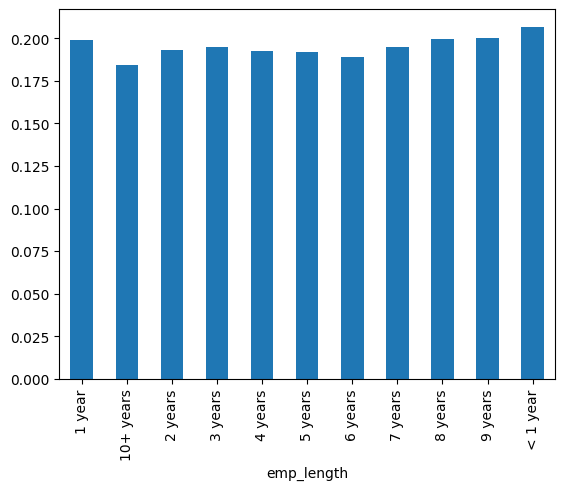

In [136]:
total.plot(x='emp_length',y='charged_off_ratio', kind='bar', legend=False)

In [137]:
data = data.drop('emp_length', axis=1)

In [138]:
data['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [139]:
data['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [140]:
data = data.drop('title', axis=1)

In [141]:
data['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [142]:
data.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [143]:
data['total_acc'].value_counts().sort_index()

total_acc
2.0        18
3.0       327
4.0      1238
5.0      2028
6.0      2923
         ... 
124.0       1
129.0       1
135.0       1
150.0       1
151.0       1
Name: count, Length: 118, dtype: int64

In [144]:
mean_sort = data.groupby('total_acc')['mort_acc'].mean().rename('mort_acc_mean')
mean_sort

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc_mean, Length: 118, dtype: float64

In [145]:
data = pd.merge(left=data, right=mean_sort, how='left', on=['total_acc'])

In [146]:
data['mort_acc'] = data['mort_acc'].fillna(data['mort_acc_mean'])

In [147]:
data = data.drop('mort_acc_mean', axis=1)

In [148]:
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [149]:
396030 - data.count()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [150]:
data = data.loc[~(data['revol_util'].isna() | data['pub_rec_bankruptcies'].isna())]

In [151]:
data.shape

(395219, 25)

In [152]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [153]:
data.select_dtypes(object).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [154]:
data['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [155]:
data['term'] = data['term'].str[1:3].astype(int)

C:\Users\iitka\AppData\Local\Temp\ipykernel_6956\3213161853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['term'] = data['term'].str[1:3].astype(int)


In [156]:
data['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

In [157]:
data = data.drop('grade', axis=1)

In [158]:
sub_grade_arr = data.sub_grade.unique()
sub_grade_arr.sort()
sub_grade_arr

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [159]:
data[sub_grade_arr] = 0

In [160]:
for sub_g in sub_grade_arr:
    data.loc[data['sub_grade'] == sub_g, sub_g] = 1

In [161]:
data = data.drop('sub_grade', axis=1)

In [162]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],
      dtype='object')

In [163]:
data.select_dtypes(object).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [164]:
data['verification_status'].value_counts()

verification_status
Verified           139451
Source Verified    131301
Not Verified       124467
Name: count, dtype: int64

In [165]:
data['application_type'].value_counts()

application_type
INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [166]:
data['initial_list_status'].value_counts()

initial_list_status
f    237346
w    157873
Name: count, dtype: int64

In [167]:
data['purpose'].value_counts().sort_index()

purpose
car                     4670
credit_card            82923
debt_consolidation    234169
educational              246
home_improvement       23961
house                   2197
major_purchase          8756
medical                 4175
moving                  2842
other                  21059
renewable_energy         329
small_business          5656
vacation                2442
wedding                 1794
Name: count, dtype: int64

In [168]:
data['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [169]:
def to_dummy(df, col_name):
    df = df.copy()
    unique_entries = df[col_name].unique()
    unique_entries.sort()
    _col_name = f'_{col_name}'
    df[_col_name] = 0
    for i in range(unique_entries.size):
        df.loc[df[col_name] == unique_entries[i], _col_name] = i

    df[col_name] = df[_col_name]
    df = df.drop(_col_name, axis=1)
    
    return df

In [170]:
data = to_dummy(data, 'verification_status')
data = to_dummy(data, 'application_type')
data = to_dummy(data, 'initial_list_status')
data = to_dummy(data, 'purpose')

In [171]:
data

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,0,Jan-2015,Fully Paid,12,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,0,Jan-2015,Fully Paid,2,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,1,Jan-2015,Fully Paid,1,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,0,Nov-2014,Fully Paid,1,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,2,Apr-2013,Charged Off,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,1,Oct-2015,Fully Paid,2,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,1,Feb-2015,Fully Paid,2,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,2,Oct-2013,Fully Paid,2,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,2,Aug-2012,Fully Paid,2,...,0,0,0,0,0,0,0,0,0,0


In [172]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [173]:
data.loc[(data['home_ownership'] == 'NONE') | (data['home_ownership'] == 'ANY'), 'home_ownership'] = 'OTHER'

In [174]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [175]:
data = to_dummy(data, 'home_ownership')

In [176]:
data['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [177]:
data['zip_code'] = data['address'].str[-5:].astype(int)

In [178]:
data['zip_code'].unique()

array([22690,  5113,   813, 11650, 30723, 70466, 29597, 48052, 86630,
       93700])

In [179]:
data = to_dummy(data, 'zip_code')

In [180]:
data

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F2,F3,F4,F5,G1,G2,G3,G4,G5,zip_code
0,10000.0,36,11.44,329.48,3,117000.0,0,Jan-2015,Fully Paid,12,...,0,0,0,0,0,0,0,0,0,3
1,8000.0,36,11.99,265.68,0,65000.0,0,Jan-2015,Fully Paid,2,...,0,0,0,0,0,0,0,0,0,1
2,15600.0,36,10.49,506.97,3,43057.0,1,Jan-2015,Fully Paid,1,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,3,54000.0,0,Nov-2014,Fully Paid,1,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,0,55000.0,2,Apr-2013,Charged Off,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,3,40000.0,1,Oct-2015,Fully Paid,2,...,0,0,0,0,0,0,0,0,0,5
396026,21000.0,36,12.29,700.42,0,110000.0,1,Feb-2015,Fully Paid,2,...,0,0,0,0,0,0,0,0,0,1
396027,5000.0,36,9.99,161.32,3,56500.0,2,Oct-2013,Fully Paid,2,...,0,0,0,0,0,0,0,0,0,7
396028,21000.0,60,15.31,503.02,0,64000.0,2,Aug-2012,Fully Paid,2,...,0,0,0,0,0,0,0,0,0,4


In [181]:
data = data.drop('address', axis=1)

In [182]:
data = data.drop('issue_d', axis=1)


In [183]:
data['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [184]:
data['earliest_cr_year'] = data['earliest_cr_line'].str[-4:].astype(int)

In [185]:
data = data.drop('earliest_cr_line', axis=1)

In [186]:
data.select_dtypes(object).columns

Index(['loan_status'], dtype='object')

In [187]:
data

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,...,F3,F4,F5,G1,G2,G3,G4,G5,zip_code,earliest_cr_year
0,10000.0,36,11.44,329.48,3,117000.0,0,Fully Paid,12,26.24,...,0,0,0,0,0,0,0,0,3,1990
1,8000.0,36,11.99,265.68,0,65000.0,0,Fully Paid,2,22.05,...,0,0,0,0,0,0,0,0,1,2004
2,15600.0,36,10.49,506.97,3,43057.0,1,Fully Paid,1,12.79,...,0,0,0,0,0,0,0,0,1,2007
3,7200.0,36,6.49,220.65,3,54000.0,0,Fully Paid,1,2.60,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,0,55000.0,2,Charged Off,1,33.95,...,0,0,0,0,0,0,0,0,2,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,3,40000.0,1,Fully Paid,2,15.63,...,0,0,0,0,0,0,0,0,5,2004
396026,21000.0,36,12.29,700.42,0,110000.0,1,Fully Paid,2,21.45,...,0,0,0,0,0,0,0,0,1,2006
396027,5000.0,36,9.99,161.32,3,56500.0,2,Fully Paid,2,17.56,...,0,0,0,0,0,0,0,0,7,1997
396028,21000.0,60,15.31,503.02,0,64000.0,2,Fully Paid,2,15.88,...,0,0,0,0,0,0,0,0,4,1990


In [188]:
data = data.drop('loan_status', axis=1)

Model Preparation

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [190]:
small_data = data.sample(frac=0.1, random_state=101)

In [191]:
X = small_data.drop('loan_repaid', axis=1).values
y = small_data['loan_repaid'].values

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [193]:
scalar = MinMaxScaler()

In [194]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [195]:
X_train.shape

(31617, 55)

In [196]:
model = Sequential()

In [197]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dense(39, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [200]:
model.fit(x=X_train, y=y_train, batch_size=256, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
124/124 [==============================] - 1s 5ms/step - loss: 0.2118 - val_loss: 0.3584
Epoch 2/100
124/124 [==============================] - 1s 5ms/step - loss: 0.2135 - val_loss: 0.3404
Epoch 3/100
124/124 [==============================] - 1s 4ms/step - loss: 0.2128 - val_loss: 0.3457
Epoch 4/100
124/124 [==============================] - 1s 5ms/step - loss: 0.2127 - val_loss: 0.3473
Epoch 5/100
124/124 [==============================] - 1s 5ms/step - loss: 0.2137 - val_loss: 0.3368
Epoch 6/100
124/124 [==============================] - 1s 5ms/step - loss: 0.2139 - val_loss: 0.3366
Epoch 7/100
124/124 [==============================] - 1s 5ms/step - loss: 0.2114 - val_loss: 0.3452
Epoch 8/100
124/124 [==============================] - 1s 5ms/step - loss: 0.2109 - val_loss: 0.3467
Epoch 9/100
124/124 [==============================] - 1s 5ms/step - loss: 0.2135 - val_loss: 0.3409
Epoch 10/100
124/124 [==============================] - 1s 5ms/step - loss: 0.2113 - val_lo

In [201]:
losses = pd.DataFrame(model.history.history)

<Axes: >

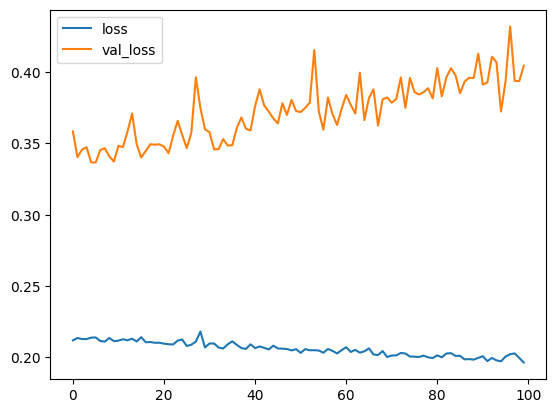

In [202]:
losses.plot()

In [203]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)

In [204]:
model.fit(x=X_train, y=y_train, batch_size=256, validation_data=(X_test, y_test), epochs=250, callbacks=[early_stop])

Epoch 1/250
124/124 [==============================] - 1s 6ms/step - loss: 0.1977 - val_loss: 0.3951
Epoch 2/250
124/124 [==============================] - 1s 5ms/step - loss: 0.1972 - val_loss: 0.4108
Epoch 3/250
124/124 [==============================] - 1s 5ms/step - loss: 0.2002 - val_loss: 0.3971
Epoch 4/250
124/124 [==============================] - 1s 5ms/step - loss: 0.2008 - val_loss: 0.3976
Epoch 5/250
124/124 [==============================] - 1s 5ms/step - loss: 0.1991 - val_loss: 0.4123
Epoch 6/250
124/124 [==============================] - 1s 5ms/step - loss: 0.1973 - val_loss: 0.4178
Epoch 7/250
124/124 [==============================] - 1s 6ms/step - loss: 0.1984 - val_loss: 0.4156
Epoch 8/250
124/124 [==============================] - 1s 6ms/step - loss: 0.2002 - val_loss: 0.4029
Epoch 9/250
124/124 [==============================] - 1s 6ms/step - loss: 0.1969 - val_loss: 0.3997
Epoch 10/250
124/124 [==============================] - 1s 6ms/step - loss: 0.1993 - val_lo

In [205]:
losses = pd.DataFrame(model.history.history)

<Axes: >

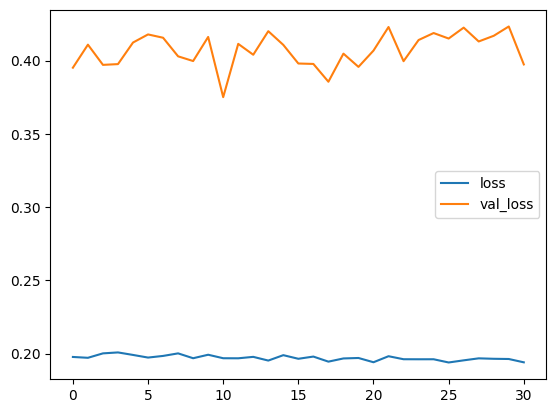

In [206]:
losses.plot()

In [207]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [208]:
model.fit(x=X_train, y=y_train, batch_size=256, validation_data=(X_test, y_test), epochs=250, callbacks=[early_stop])

Epoch 1/250
124/124 [==============================] - 1s 7ms/step - loss: 0.5281 - val_loss: 0.4627
Epoch 2/250
124/124 [==============================] - 1s 5ms/step - loss: 0.4569 - val_loss: 0.4298
Epoch 3/250
124/124 [==============================] - 1s 5ms/step - loss: 0.4407 - val_loss: 0.4224
Epoch 4/250
124/124 [==============================] - 1s 6ms/step - loss: 0.4340 - val_loss: 0.4187
Epoch 5/250
124/124 [==============================] - 1s 7ms/step - loss: 0.4290 - val_loss: 0.4154
Epoch 6/250
124/124 [==============================] - 1s 7ms/step - loss: 0.4239 - val_loss: 0.4091
Epoch 7/250
124/124 [==============================] - 1s 6ms/step - loss: 0.4166 - val_loss: 0.4038
Epoch 8/250
124/124 [==============================] - 1s 6ms/step - loss: 0.4111 - val_loss: 0.3979
Epoch 9/250
124/124 [==============================] - 1s 6ms/step - loss: 0.4054 - val_loss: 0.3961
Epoch 10/250
124/124 [==============================] - 1s 6ms/step - loss: 0.3992 - val_lo

<Axes: >

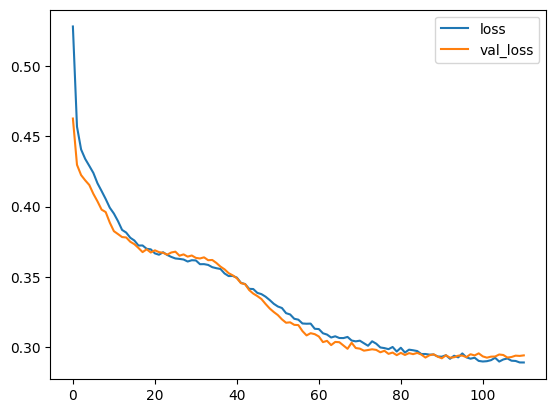

In [209]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Model Evaluation

In [210]:
from sklearn.metrics import confusion_matrix, classification_report

In [211]:
predictions = model.predict(X_test)

248/248 [==============================] - 1s 2ms/step


In [212]:
predictions = (predictions>0.5).astype(int)

In [213]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [214]:
y_test

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [215]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.42      0.59      1570
           1       0.87      1.00      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.92      0.71      0.76      7905
weighted avg       0.89      0.88      0.86      7905



In [216]:
print(confusion_matrix(y_test, predictions))


[[ 659  911]
 [  20 6315]]


In [217]:
random_ind = np.random.randint(0, len(X))
[random_ind, model.predict(X[random_ind][None,:]), y[random_ind]]

1/1 [==============================] - 0s 31ms/step


[530, array([[1.]], dtype=float32), 1]

In [218]:
X_train.shape

(31617, 55)